# General Overview - Statistical Analysis

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

Use chi square test for categorical variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('tree_census_stat_ready.csv', index_col=0, encoding='utf-8') # import data
tree = data.copy() # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651829 entries, 0 to 683787
Data columns (total 22 columns):
tree_id         651829 non-null int64
tree_dbh        651829 non-null int64
curb_loc        651829 non-null object
health          651829 non-null object
spc_common      651829 non-null object
steward         651829 non-null object
guards          651829 non-null object
sidewalk        651829 non-null object
problems        651829 non-null object
root_stone      651829 non-null object
root_grate      651829 non-null object
root_other      651829 non-null object
trunk_wire      651829 non-null object
trnk_light      651829 non-null object
trnk_other      651829 non-null object
brch_light      651829 non-null object
brch_shoe       651829 non-null object
brch_other      651829 non-null object
borough         651829 non-null object
longitude       651829 non-null float64
latitude        651829 non-null float64
num_problems    651829 non-null int64
dtypes: float64(2), int64(3), ob

In [4]:
# looking at several rows

tree.head(10)

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,...,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,longitude,latitude,num_problems
0,180683,3,OnCurb,Fair,red maple,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Queens,-73.844215,40.723092,0
1,200540,21,OnCurb,Fair,pin oak,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Queens,-73.818679,40.794111,1
2,204026,3,OnCurb,Good,honeylocust,1or2,None,Damage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.936608,40.717581,0
3,204337,10,OnCurb,Good,honeylocust,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Brooklyn,-73.934456,40.713537,1
4,189565,21,OnCurb,Good,American linden,None,None,Damage,Stones,Yes,...,No,No,No,No,No,No,Brooklyn,-73.975979,40.666778,1
5,190422,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,None,No,...,No,No,No,No,No,No,Manhattan,-73.984950,40.770046,0
6,190426,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,None,No,...,No,No,No,No,No,No,Manhattan,-73.985338,40.770210,0
7,208649,9,OnCurb,Good,American linden,None,None,NoDamage,MetalGrates,No,...,No,No,No,No,No,No,Manhattan,-73.987297,40.762724,1
8,209610,6,OnCurb,Good,honeylocust,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Staten Island,-74.076255,40.596579,0
9,192755,21,OffsetFromCurb,Fair,London planetree,None,None,NoDamage,None,No,...,No,No,No,No,No,No,Brooklyn,-73.969744,40.586357,0


The problems column is reflected in the adjacent 9 columns so we are removing it from our dataset along with longitude and latitude since they are used to map the location of the trees. We do not need the latitude and longitude columns either since they are used to map the location of the tree, see data storytelling for the maps. Finally, we are removing tree_id since the trees are identified using their index number.

In [5]:
col_remove = ['tree_id', 'problems', 'longitude', 'latitude'] # columns to remove

tree = tree.drop(col_remove, axis=1)

In [6]:
# cleaned up dataset

tree.head(10)

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borough,num_problems
0,3,OnCurb,Fair,red maple,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Queens,0
1,21,OnCurb,Fair,pin oak,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Queens,1
2,3,OnCurb,Good,honeylocust,1or2,None,Damage,No,No,No,No,No,No,No,No,No,Brooklyn,0
3,10,OnCurb,Good,honeylocust,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,1
4,21,OnCurb,Good,American linden,None,None,Damage,Yes,No,No,No,No,No,No,No,No,Brooklyn,1
5,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,No,No,No,No,No,No,Manhattan,0
6,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,No,No,No,No,No,No,Manhattan,0
7,9,OnCurb,Good,American linden,None,None,NoDamage,No,Yes,No,No,No,No,No,No,No,Manhattan,1
8,6,OnCurb,Good,honeylocust,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Staten Island,0
9,21,OffsetFromCurb,Fair,London planetree,None,None,NoDamage,No,No,No,No,No,No,No,No,No,Brooklyn,0


## Analyzing Diameter Distributions

Most of our data consists of categorical variables, only two columns, tree_dbh and num_problems, consist of numerical variables. Let's take a look at the distribution of tree_dbh, tree diameters in inches.

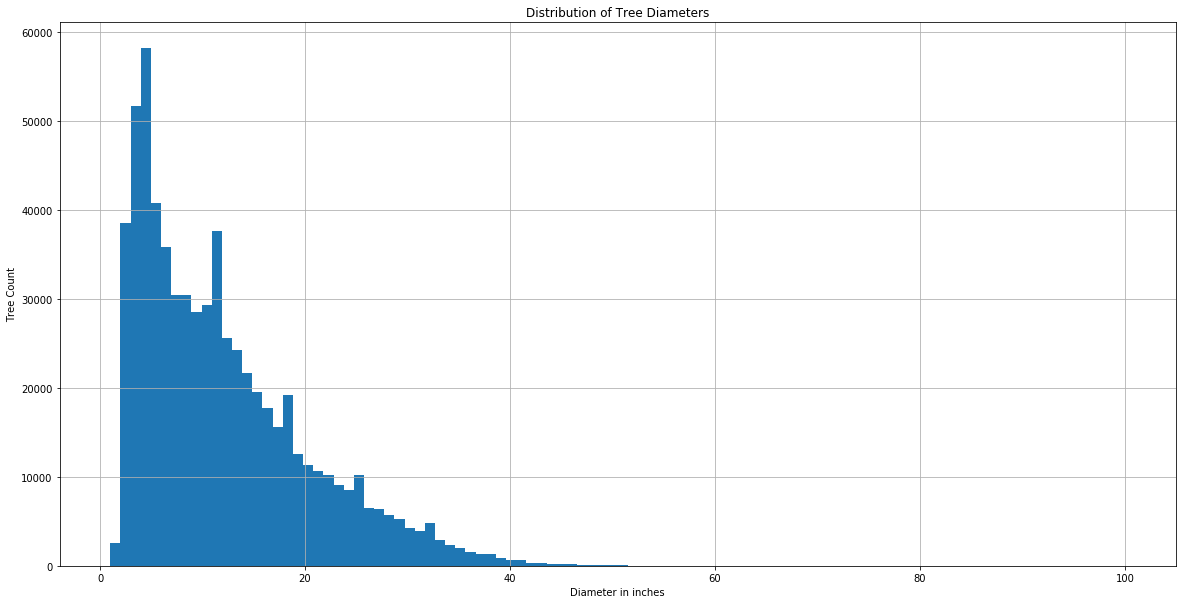

In [7]:
plt.figure(figsize=(20, 10))
tree.tree_dbh.hist(bins=100)
plt.xlabel('Diameter in inches')
plt.ylabel('Tree Count')
plt.title('Distribution of Tree Diameters')
plt.show()

The distribution of diameters is heavily skewed to the right and it looks like there are very few trees with diameters greater than 50 inches.

In [8]:
tree[tree.tree_dbh > 50].shape # number of trees with diameters greater than 50 inches

(294, 18)

Since only 294 trees have diameters greater than 50 inches, we will remove them from the dataset in order to better represent the majority of trees.

In [9]:
tree = tree[tree.tree_dbh < 51] # remove trees with diameters greater than 50 inches

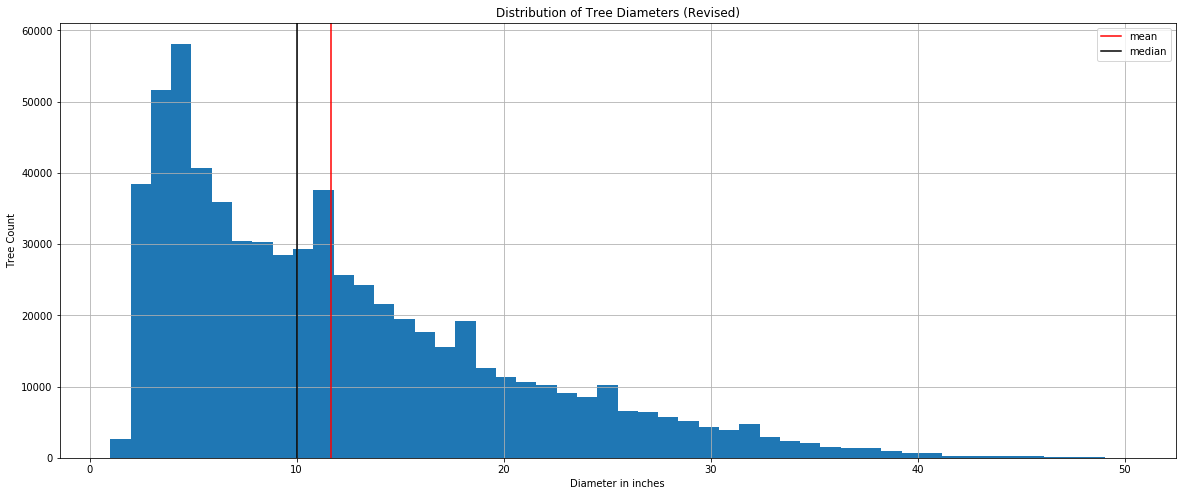

In [10]:
plt.figure(figsize=(20, 8))
tree.tree_dbh.hist(bins=50)
plt.xlabel('Diameter in inches')
plt.ylabel('Tree Count')
plt.title('Distribution of Tree Diameters (Revised)')
plt.axvline(np.mean(tree.tree_dbh), color='r', label='mean')
plt.axvline(np.median(tree.tree_dbh), color='k', label='median')
plt.legend()
plt.show()

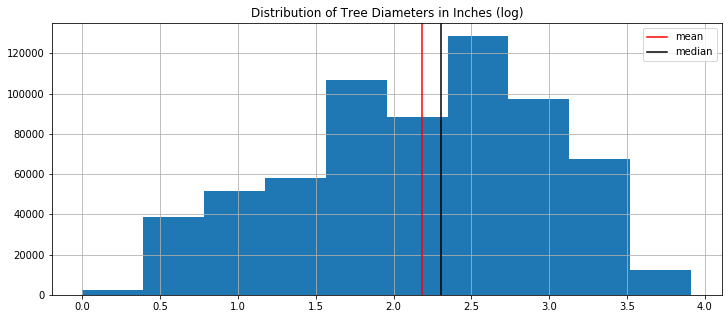

In [11]:
# take the log of tree_dbh

dbh_log = np.log(tree.tree_dbh)

plt.figure(figsize=(12, 5))
dbh_log.hist()
plt.title('Distribution of Tree Diameters in Inches (log)')
plt.axvline(np.mean(dbh_log), color='r', label='mean')
plt.axvline(np.median(dbh_log), color='k', label='median')
plt.legend()
plt.show() # the distribution appears closer to normal after taking the log

Taking the log of the diameters, the distribution is slightly skewed to the left but is closer to a normal distribution than previously.

Since we want to locate the true mean, we will calculate the 95% confidence interval.

In [12]:
# isolate diameters

diam = tree.tree_dbh

# 95% confidence interval, z score = 1.96

margin = (1.96 * np.std(diam)) / np.sqrt(len(diam))

lower = np.mean(diam) - margin
upper = np.mean(diam) + margin

print('Mean Value: ', np.mean(diam))
print('Lower Interval: ', lower)
print('Upper Interval: ', upper)

Mean Value:  11.674665213687677
Lower Interval:  11.65435006469371
Upper Interval:  11.694980362681642


In [13]:
np.percentile(diam, [2.5, 97.5]) # 95% of values are between 2 and 32

array([ 2., 32.])

## Encoding Categorical Data

### root_stone, root_grate, root_other, trunk_wire, trnk_light, trnk_other, brch_light, brch_shoe, brch_other

Since these columns contain Yes or No answers, we can convert them to 0 or 1 with 0 being No and 1 being Yes. We will use the one-hot encoding scheme.

In [14]:
# root_stone
# tree['root_stone_label'] = tree.root_stone.replace(to_replace=['No', 'Yes'], value=[0,1])
# tree.head()

In [15]:
# transform and map root_stone

rs_le = LabelEncoder()
rs_labels = rs_le.fit_transform(tree.root_stone)
tree['root_stone_labels'] = rs_labels

In [16]:
# function to transform and map remaining columns

cols_transform = ['root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']

for x in cols_transform:
    tree[x + '_labels'] = LabelEncoder().fit_transform(tree[x])

In [17]:
# view results - partial

tree[['root_stone', 'root_stone_labels', 'root_grate', 'root_grate_labels', 'root_other', 'root_other_labels', 'trunk_wire', 'trunk_wire_labels', 'trnk_light', 'trnk_light_labels']].head()

,root_stone,root_stone_labels,root_grate,root_grate_labels,root_other,root_other_labels,trunk_wire,trunk_wire_labels,trnk_light,trnk_light_labels
0,No,0,No,0,No,0,No,0,No,0
1,Yes,1,No,0,No,0,No,0,No,0
2,No,0,No,0,No,0,No,0,No,0
3,Yes,1,No,0,No,0,No,0,No,0
4,Yes,1,No,0,No,0,No,0,No,0


In [18]:
# overall view

tree.head(10)

,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,root_stone,root_grate,root_other,...,num_problems,root_stone_labels,root_grate_labels,root_other_labels,trunk_wire_labels,trnk_light_labels,trnk_other_labels,brch_light_labels,brch_shoe_labels,brch_other_labels
0,3,OnCurb,Fair,red maple,None,None,NoDamage,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,21,OnCurb,Fair,pin oak,None,None,Damage,Yes,No,No,...,1,1,0,0,0,0,0,0,0,0
2,3,OnCurb,Good,honeylocust,1or2,None,Damage,No,No,No,...,0,0,0,0,0,0,0,0,0,0
3,10,OnCurb,Good,honeylocust,None,None,Damage,Yes,No,No,...,1,1,0,0,0,0,0,0,0,0
4,21,OnCurb,Good,American linden,None,None,Damage,Yes,No,No,...,1,1,0,0,0,0,0,0,0,0
5,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,...,0,0,0,0,0,0,0,0,0,0
6,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,No,No,No,...,0,0,0,0,0,0,0,0,0,0
7,9,OnCurb,Good,American linden,None,None,NoDamage,No,Yes,No,...,1,0,1,0,0,0,0,0,0,0
8,6,OnCurb,Good,honeylocust,None,None,NoDamage,No,No,No,...,0,0,0,0,0,0,0,0,0,0
9,21,OffsetFromCurb,Fair,London planetree,None,None,NoDamage,No,No,No,...,0,0,0,0,0,0,0,0,0,0


The next part involves creating new columns for each answer option.

### Curb Location

In [19]:
# overview

tree.groupby('curb_loc')['health'].value_counts()

curb_loc        health
OffsetFromCurb  Good       20814
                Fair        4022
                Poor         963
OnCurb          Good      507513
                Fair       92405
                Poor       25818
Name: health, dtype: int64

In [20]:
# use one-hot encoding scheme, get dummies variable

curb_loc_dummies = pd.get_dummies(tree.curb_loc)
curb_loc_dummies.sample(10)

,OffsetFromCurb,OnCurb
432235,0,1
154533,0,1
241170,0,1
313189,0,1
42417,0,1
560878,0,1
629433,0,1
416613,0,1
474415,0,1
512553,0,1


In [21]:
pd.concat([tree.curb_loc, curb_loc_dummies], axis=1).head(10)

,curb_loc,OffsetFromCurb,OnCurb
0,OnCurb,0,1
1,OnCurb,0,1
2,OnCurb,0,1
3,OnCurb,0,1
4,OnCurb,0,1
5,OnCurb,0,1
6,OnCurb,0,1
7,OnCurb,0,1
8,OnCurb,0,1
9,OffsetFromCurb,1,0


### Stewardships

Let's see if there is a relationship between stewardship and tree health using the chi square test. Our null hypothesis states that there is no relationship (i.e. correlation) between the health of a tree and tree stewardship.

In [22]:
tree.groupby('steward')['health'].value_counts()

steward  health
1or2     Good      115231
         Fair       21883
         Poor        6276
3or4     Good       15594
         Fair        2829
         Poor         747
4orMore  Good        1360
         Fair         200
         Poor          49
None     Good      396142
         Fair       71515
         Poor       19709
Name: health, dtype: int64

In [23]:
# encoding

steward_dummies = pd.get_dummies(tree.steward)
steward_dummies.head()

,1or2,3or4,4orMore,None
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [24]:
pd.concat([tree.steward, steward_dummies], axis=1).head()

,steward,1or2,3or4,4orMore,None
0,None,0,0,0,1
1,None,0,0,0,1
2,1or2,1,0,0,0
3,None,0,0,0,1
4,None,0,0,0,1


### Guards

In [25]:
tree.groupby('guards')['health'].value_counts()

guards   health
Harmful  Good       15313
         Fair        3836
         Poor        1091
Helpful  Good       42602
         Fair        7159
         Poor        2061
None     Good      464503
         Fair       84057
         Poor       23169
Unsure   Good        5909
         Fair        1375
         Poor         460
Name: health, dtype: int64

In [26]:
# encoding

guards_dummies = pd.get_dummies(tree.guards)
guards_dummies.sample(10)

,Harmful,Helpful,None,Unsure
386314,0,0,1,0
393837,0,0,1,0
223638,0,0,1,0
435636,0,0,1,0
625369,0,0,1,0
98196,0,0,1,0
531200,0,0,1,0
21855,0,0,1,0
34358,0,0,1,0
613981,0,0,0,1


In [27]:
pd.concat([tree.guards, guards_dummies], axis=1).head(10)

,guards,Harmful,Helpful,None,Unsure
0,None,0,0,1,0
1,None,0,0,1,0
2,None,0,0,1,0
3,None,0,0,1,0
4,None,0,0,1,0
5,Helpful,0,1,0,0
6,Helpful,0,1,0,0
7,None,0,0,1,0
8,None,0,0,1,0
9,None,0,0,1,0


### Sidewalk

In [28]:
tree.groupby('sidewalk')['health'].value_counts()

sidewalk  health
Damage    Good      151750
          Fair       28676
          Poor        6593
NoDamage  Good      376577
          Fair       67751
          Poor       20188
Name: health, dtype: int64

In [29]:
# encoding

sidewalk_dummies = pd.get_dummies(tree.sidewalk)
sidewalk_dummies.head()

,Damage,NoDamage
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
pd.concat([tree.sidewalk, sidewalk_dummies], axis=1).head(10)

,sidewalk,Damage,NoDamage
0,NoDamage,0,1
1,Damage,1,0
2,Damage,1,0
3,Damage,1,0
4,Damage,1,0
5,NoDamage,0,1
6,NoDamage,0,1
7,NoDamage,0,1
8,NoDamage,0,1
9,NoDamage,0,1


### Borough

In [31]:
borough_dummies = pd.get_dummies(tree.borough)
borough_dummies.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [32]:
pd.concat([tree.borough, borough_dummies], axis=1).head(10)

,borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Queens,0,0,0,1,0
1,Queens,0,0,0,1,0
2,Brooklyn,0,1,0,0,0
3,Brooklyn,0,1,0,0,0
4,Brooklyn,0,1,0,0,0
5,Manhattan,0,0,1,0,0
6,Manhattan,0,0,1,0,0
7,Manhattan,0,0,1,0,0
8,Staten Island,0,0,0,0,1
9,Brooklyn,0,1,0,0,0


### Combining the columns together

In [33]:
# create a new dataset with newly created rows from one-hot encoding

tree_update = pd.concat([tree.tree_dbh, 
                         tree.health,
                         tree.curb_loc, 
                         curb_loc_dummies, 
                         tree.spc_common, 
                         tree.steward, 
                         steward_dummies, 
                         tree.guards, 
                         guards_dummies, 
                         tree.sidewalk, 
                         sidewalk_dummies, 
                         tree[['root_stone', 
                               'root_stone_labels', 
                               'root_grate', 
                               'root_grate_labels',
                               'root_other', 
                               'root_other_labels', 
                               'trunk_wire', 
                               'trunk_wire_labels', 
                               'trnk_light', 
                               'trnk_light_labels', 
                               'trnk_other', 
                               'trnk_other_labels', 
                               'brch_light', 
                               'brch_light_labels', 
                               'brch_shoe', 
                               'brch_shoe_labels', 
                               'brch_other', 
                               'brch_other_labels', 
                               'borough']], 
                         borough_dummies, 
                         tree.num_problems], axis=1)

tree_update.head(10)

,tree_dbh,health,curb_loc,OffsetFromCurb,OnCurb,spc_common,steward,1or2,3or4,4orMore,...,brch_shoe_labels,brch_other,brch_other_labels,borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,num_problems
0,3,Fair,OnCurb,0,1,red maple,None,0,0,0,...,0,No,0,Queens,0,0,0,1,0,0
1,21,Fair,OnCurb,0,1,pin oak,None,0,0,0,...,0,No,0,Queens,0,0,0,1,0,1
2,3,Good,OnCurb,0,1,honeylocust,1or2,1,0,0,...,0,No,0,Brooklyn,0,1,0,0,0,0
3,10,Good,OnCurb,0,1,honeylocust,None,0,0,0,...,0,No,0,Brooklyn,0,1,0,0,0,1
4,21,Good,OnCurb,0,1,American linden,None,0,0,0,...,0,No,0,Brooklyn,0,1,0,0,0,1
5,11,Good,OnCurb,0,1,honeylocust,1or2,1,0,0,...,0,No,0,Manhattan,0,0,1,0,0,0
6,11,Good,OnCurb,0,1,honeylocust,1or2,1,0,0,...,0,No,0,Manhattan,0,0,1,0,0,0
7,9,Good,OnCurb,0,1,American linden,None,0,0,0,...,0,No,0,Manhattan,0,0,1,0,0,1
8,6,Good,OnCurb,0,1,honeylocust,None,0,0,0,...,0,No,0,Staten Island,0,0,0,0,1,0
9,21,Fair,OffsetFromCurb,1,0,London planetree,None,0,0,0,...,0,No,0,Brooklyn,0,1,0,0,0,0


In [34]:
print('The dataset has {} rows and {} columns.'.format(tree_update.shape[0], tree_update.shape[1]))

The dataset has 651535 rows and 44 columns.


### Encoding Tree Types (spc_common)

Since there are many different kinds of trees, we use Feature Hashing as way of dealing with large scale categorical variables.

In [35]:
print('Number of unique trees: ', len(tree.spc_common.unique()))

Number of unique trees:  132


In [36]:
# use feature hashing, is there a better way to do this?